CREDIT CARD FRAUD DETECTION



In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns

# Assuming the dataset is loaded from a CSV file
df = pd.read_csv("creditcard.csv")

# Checking for missing values
print(df.isnull().sum())

# Normalizing the data (except the 'Time', 'Amount', and 'Class' columns)
features = df.drop(columns=['Time', 'Amount', 'Class'])
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Adding 'Amount' back without normalization
normalized_df = pd.DataFrame(normalized_features, columns=features.columns)
normalized_df['Amount'] = df['Amount']
normalized_df['Class'] = df['Class']

# Handle class imbalance using SMOTE
X = normalized_df.drop(columns=['Class'])
y = normalized_df['Class']

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [22]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)




c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf_clf = rf_clf.predict(X_test)

In [23]:
# Evaluation for Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     56750
           1       0.98      0.93      0.96     56976

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



In [24]:
# Evaluation for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf_clf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [25]:
# Confusion Matrix for Logistic Regression
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression Confusion Matrix:
[[55750  1000]
 [ 3726 53250]]


In [26]:
# Confusion Matrix for Random Forest
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_clf))

Random Forest Confusion Matrix:
[[56737    13]
 [    0 56976]]


In [27]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Data Visualization

In [19]:
# Set the style of seaborn
sns.set(style="whitegrid")

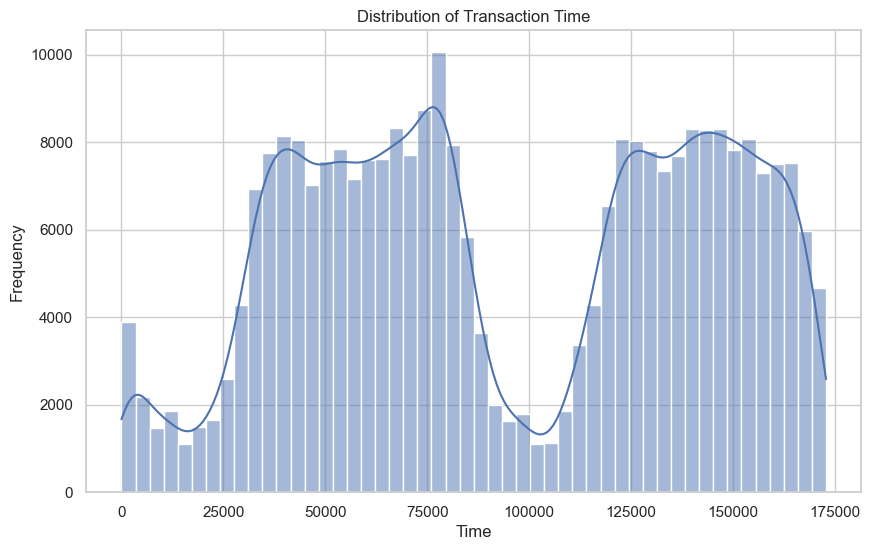

In [33]:
# Visualize the distribution of the 'Time' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Distribution of Transaction Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

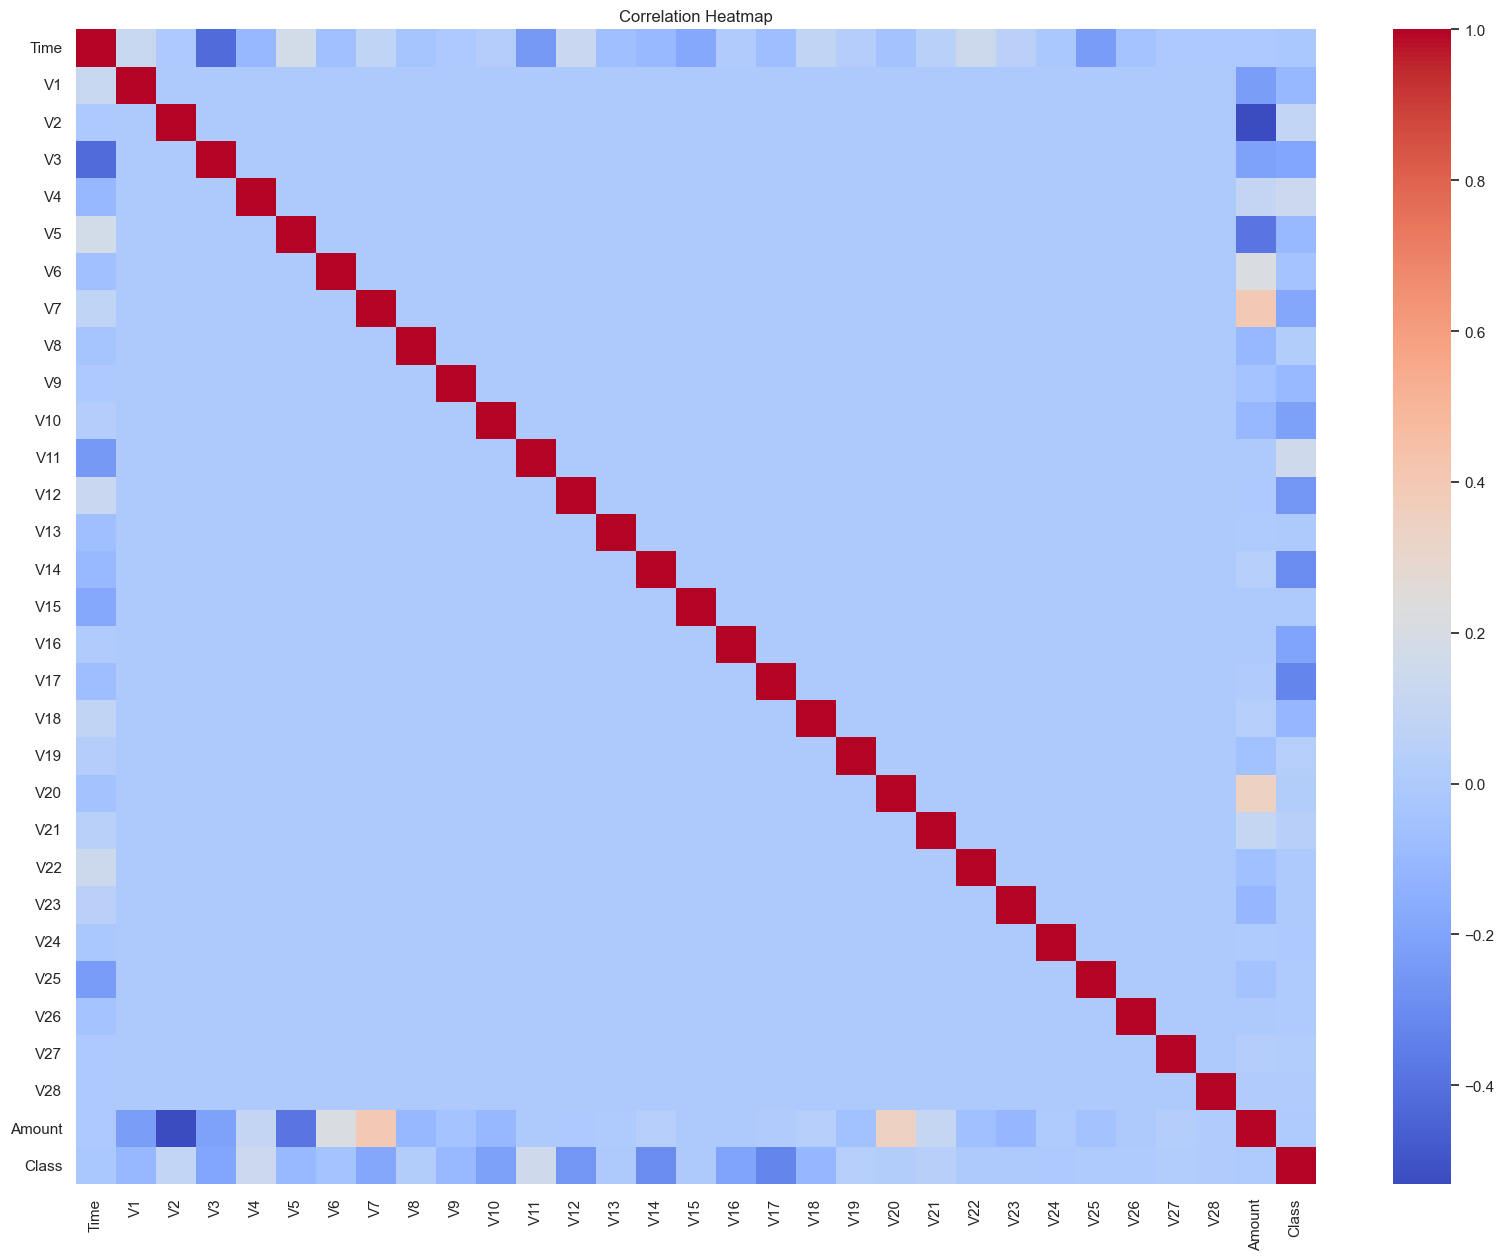

In [36]:
# Plot a correlation heatmap
plt.figure(figsize=(20, 15))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

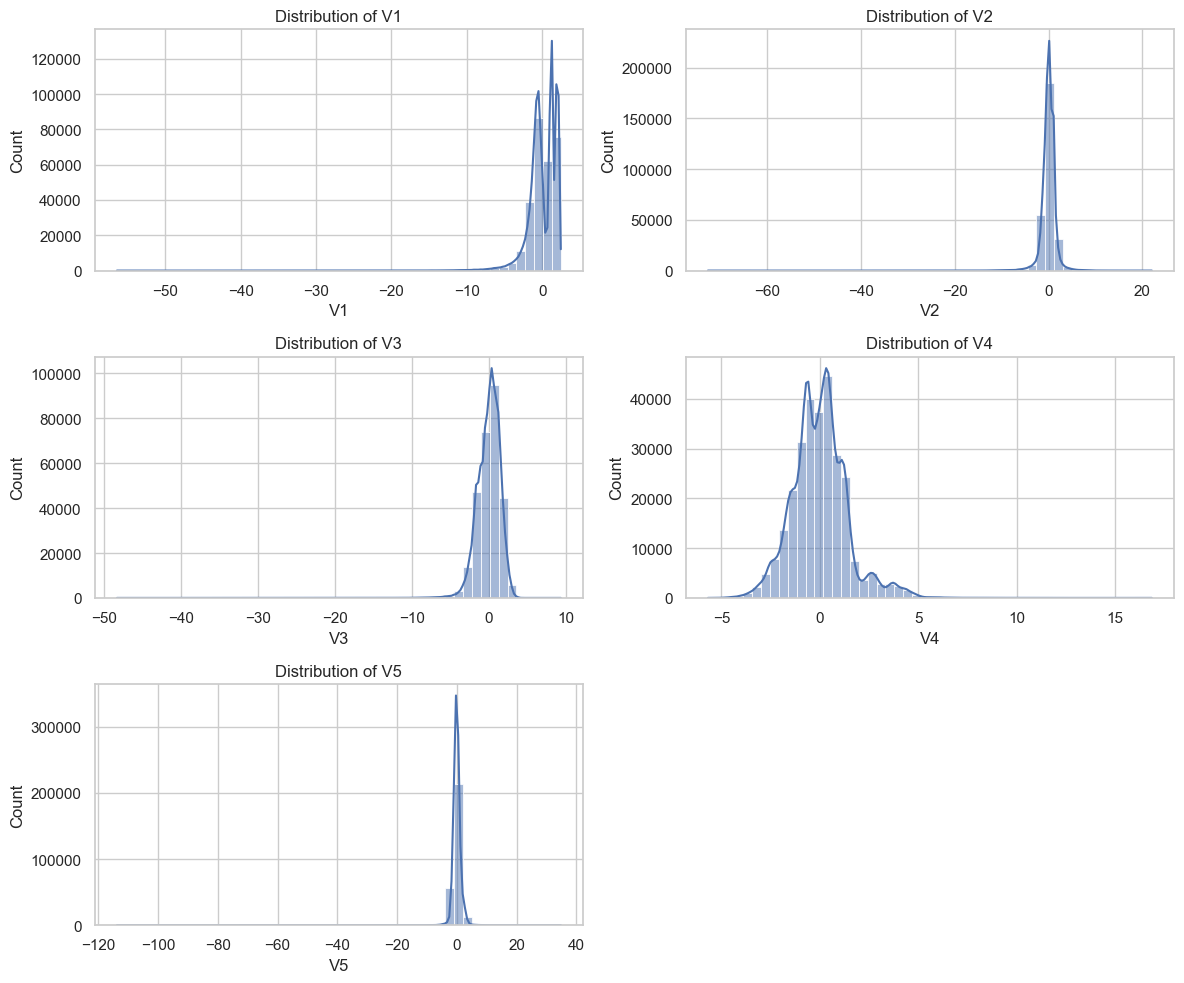

In [38]:
# Visualize the distribution of a few features
features = ['V1', 'V2', 'V3', 'V4', 'V5']
plt.figure(figsize=(12, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

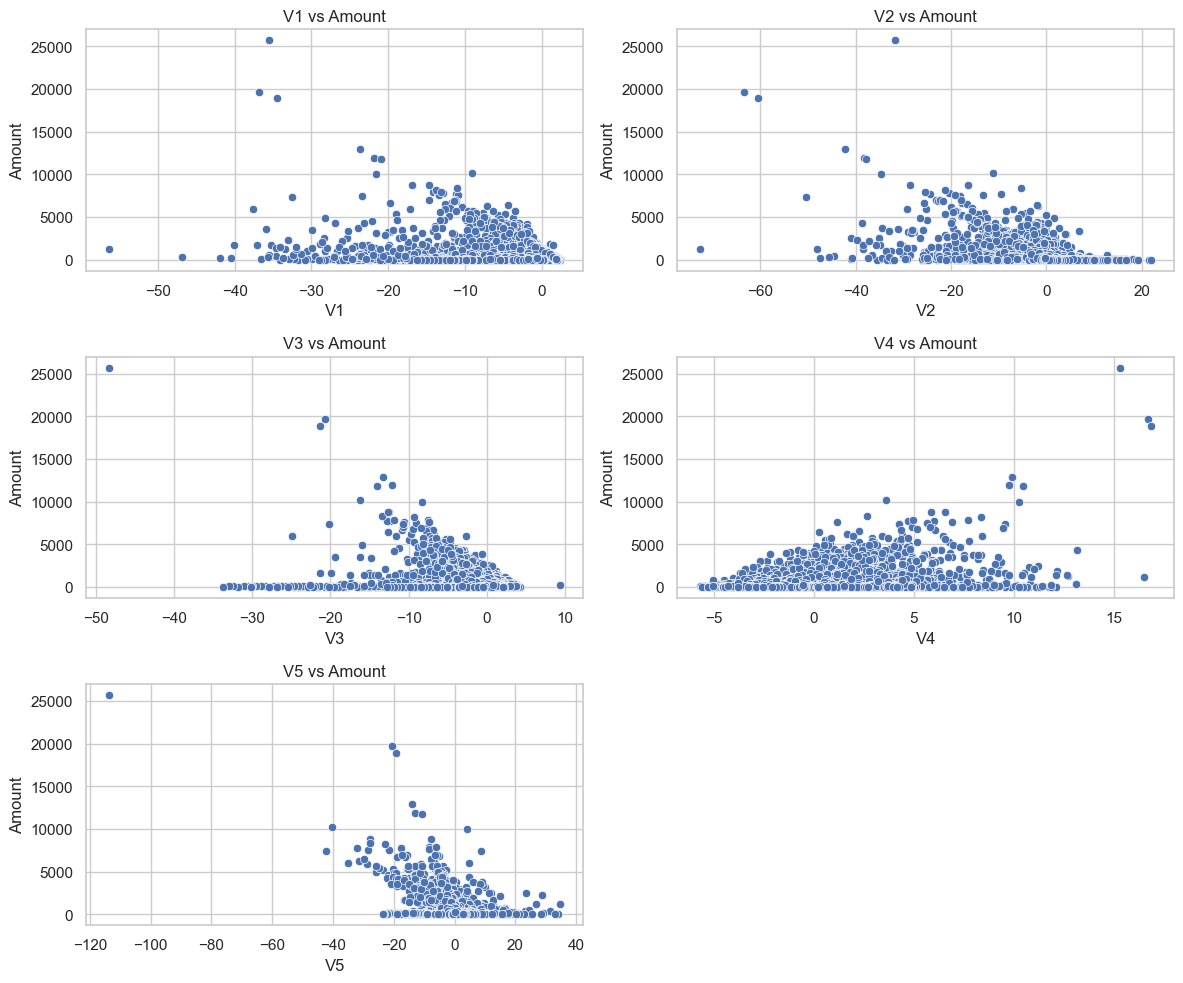

In [39]:
# Scatter plots of Amount vs V1 to V5
plt.figure(figsize=(12, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x=df[feature], y=df['Amount'])
    plt.title(f'{feature} vs Amount')
plt.tight_layout()
plt.show()

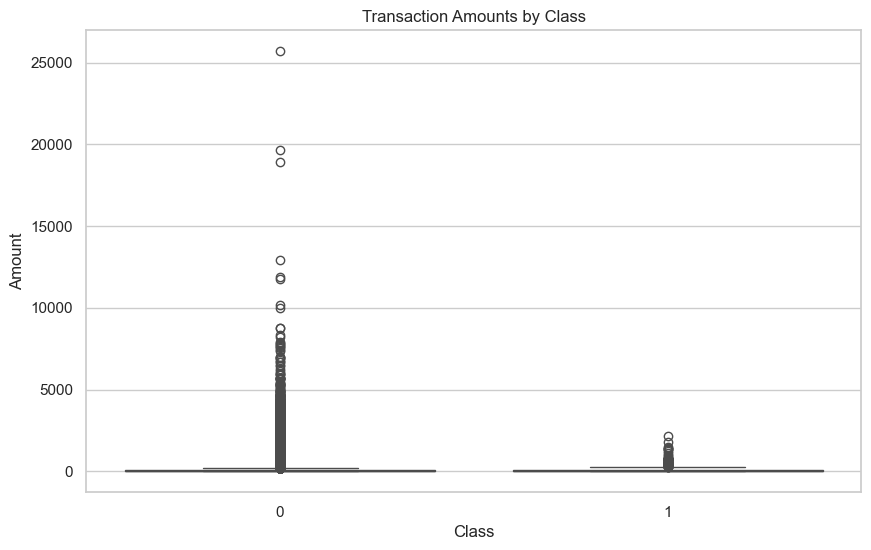

In [43]:
# Boxplot to check the distribution of Amount for Fraud and Non-Fraud transactions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amounts by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

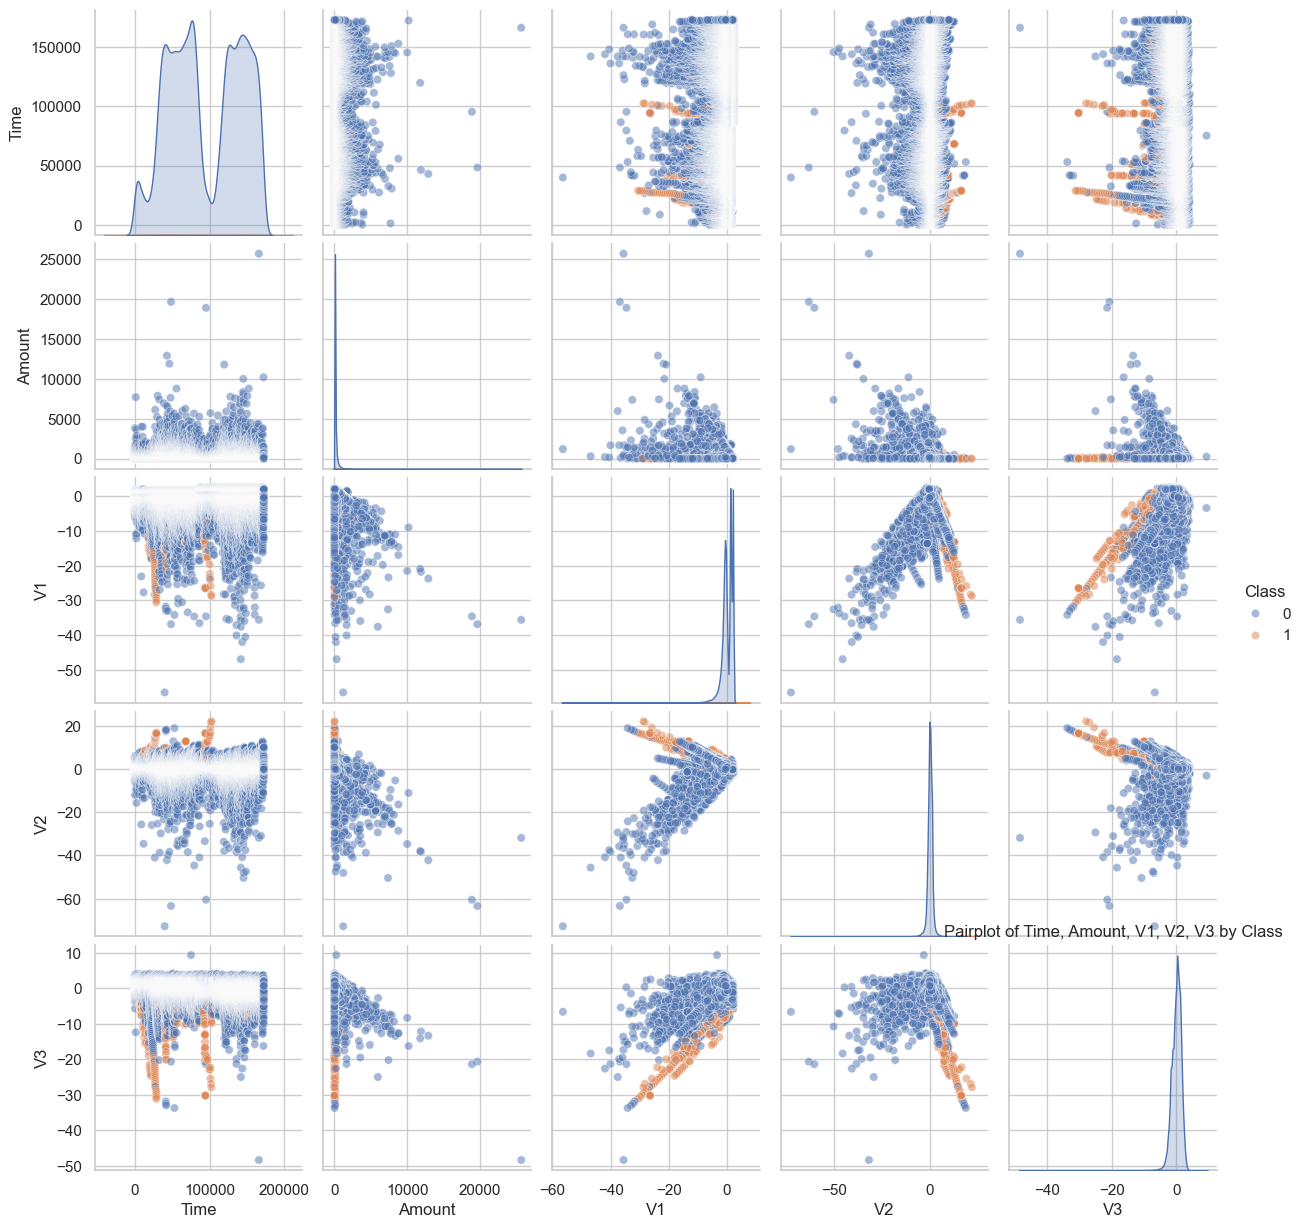

In [45]:
# Pairplot to visualize relationships between Time, Amount, and a few features
sns.pairplot(df, vars=['Time', 'Amount', 'V1', 'V2', 'V3'], hue='Class', plot_kws={'alpha':0.5})
plt.title('Pairplot of Time, Amount, V1, V2, V3 by Class')
plt.show()